# Probability mass functions


In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2


<IPython.core.display.Javascript object>

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")

<IPython.core.display.Javascript object>

In [3]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats/raw/v3/nb/2002FemPreg.dat.gz"
)

<IPython.core.display.Javascript object>

## Pmfs

Another way to represent a distribution is a **probability mass
function** (PMF), which maps from each value to its probability. A
**probability** is a frequency expressed as a fraction of the sample
size, `n`. To get from frequencies to probabilities, we divide through
by `n`, which is called **normalization**.

Given a Hist, we can make a dictionary that maps from each value to its
probability:

Or we can use the Pmf class provided by `thinkstats2`. Like Hist, the
Pmf constructor can take a list, pandas Series, dictionary, Hist, or
another Pmf object. Here's an example with a simple list:

In [4]:
import thinkstats2

pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

<IPython.core.display.Javascript object>

The Pmf is normalized so total probability is 1.

Pmf and Hist objects are similar in many ways; in fact, they inherit
many of their methods from a common parent class. For example, the
methods `Values` and `Items` work the same way for both. The biggest
difference is that a Hist maps from values to integer counters; a Pmf
maps from values to floating-point probabilities.

To look up the probability associated with a value, use `Prob`:

In [5]:
pmf.prob(2)

0.4

<IPython.core.display.Javascript object>

The bracket operator is equivalent:

In [6]:
pmf[2]

0.4

<IPython.core.display.Javascript object>

You can modify an existing Pmf by incrementing the probability
associated with a value:

In [7]:
pmf.incr(2, 0.2)
pmf.prob(2)

0.6000000000000001

<IPython.core.display.Javascript object>

Or you can multiply a probability by a factor:

In [8]:
pmf.mult(2, 0.5)
pmf.prob(2)

0.30000000000000004

<IPython.core.display.Javascript object>

If you modify a Pmf, the result may not be normalized; that is, the
probabilities may no longer add up to 1. To check, you can call `Total`,
which returns the sum of the probabilities:

In [9]:
pmf.total()

0.8999999999999999

<IPython.core.display.Javascript object>

To renormalize, call `Normalize`:

In [10]:
pmf.normalize()
pmf.total()

1.0

<IPython.core.display.Javascript object>

Pmf objects provide a `Copy` method so you can make and modify a copy
without affecting the original.

My notation in this section might seem inconsistent, but there is a
system: I use Pmf for the name of the class, `pmf` for an instance of
the class, and PMF for the mathematical concept of a probability mass
function.

## Plotting PMFs

`thinkplot` provides two ways to plot Pmfs:

-   To plot a Pmf as a bar graph, you can use `thinkplot.Hist`. Bar
    graphs are most useful if the number of values in the Pmf is small.

-   To plot a Pmf as a step function, you can use `thinkplot.Pmf`. This
    option is most useful if there are a large number of values and the
    Pmf is smooth. This function also works with Hist objects.

In addition, `pyplot` provides a function called `hist` that takes a
sequence of values, computes a histogram, and plots it. Since I use Hist
objects, I usually don't use `pyplot.hist`.

![PMF of pregnancy lengths for first babies and others, using bar graphs
and step functions.](figs/probability_nsfg_pmf.pdf){height="3.0in"}

Figure [\[probability_nsfg_pmf\]](#probability_nsfg_pmf){reference-type="ref"
reference="probability_nsfg_pmf"} shows PMFs of pregnancy length for
first babies and others using bar graphs (left) and step functions
(right).

By plotting the PMF instead of the histogram, we can compare the two
distributions without being mislead by the difference in sample size.
Based on this figure, first babies seem to be less likely than others to
arrive on time (week 39) and more likely to be a late (weeks 41 and 42).

Here's the code that generates
Figure [\[probability_nsfg_pmf\]](#probability_nsfg_pmf){reference-type="ref"
reference="probability_nsfg_pmf"}:

In [11]:
import nsfg

live, firsts, others = nsfg.make_frames()

<IPython.core.display.Javascript object>

In [12]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label="firsts")
other_pmf = thinkstats2.Pmf(others.prglngth, label="others")

<IPython.core.display.Javascript object>

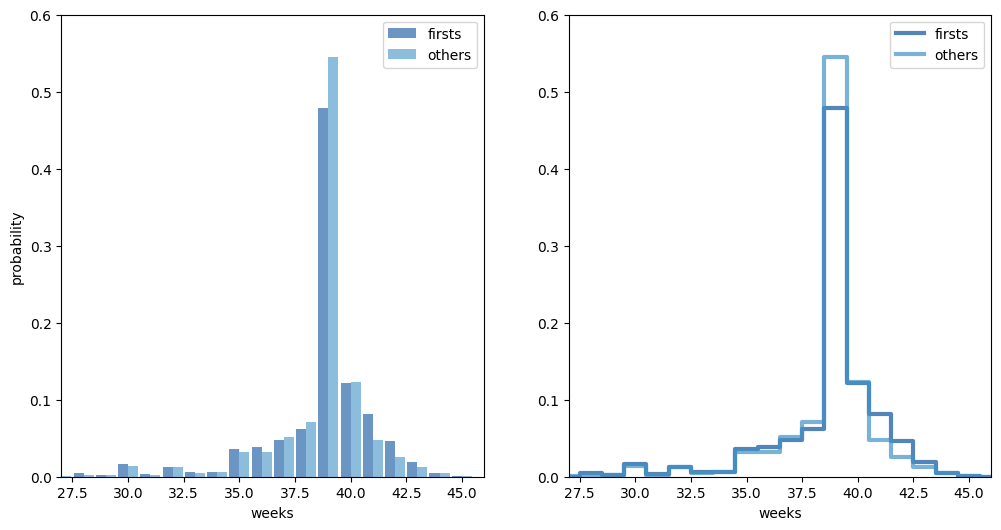

<Figure size 800x600 with 0 Axes>

<IPython.core.display.Javascript object>

In [13]:
import thinkplot

width = 0.45
axis = [27, 46, 0, 0.6]
thinkplot.pre_plot(2, cols=2)
thinkplot.hist(first_pmf, align="right", width=width)
thinkplot.hist(other_pmf, align="left", width=width)
thinkplot.config(xlabel="weeks", ylabel="probability", axis=axis)
thinkplot.pre_plot(2)
thinkplot.sub_plot(2)
thinkplot.pmfs([first_pmf, other_pmf])
thinkplot.show(xlabel="weeks", axis=axis)

`PrePlot` takes optional parameters `rows` and `cols` to make a grid of
figures, in this case one row of two figures. The first figure (on the
left) displays the Pmfs using `thinkplot.Hist`, as we have seen before.

The second call to `PrePlot` resets the color generator. Then `SubPlot`
switches to the second figure (on the right) and displays the Pmfs using
`thinkplot.Pmfs`. I used the `axis` option to ensure that the two
figures are on the same axes, which is generally a good idea if you
intend to compare two figures.

## Other visualizations

Histograms and PMFs are useful while you are exploring data and trying
to identify patterns and relationships. Once you have an idea what is
going on, a good next step is to design a visualization that makes the
patterns you have identified as clear as possible.

In the NSFG data, the biggest differences in the distributions are near
the mode. So it makes sense to zoom in on that part of the graph, and to
transform the data to emphasize differences:

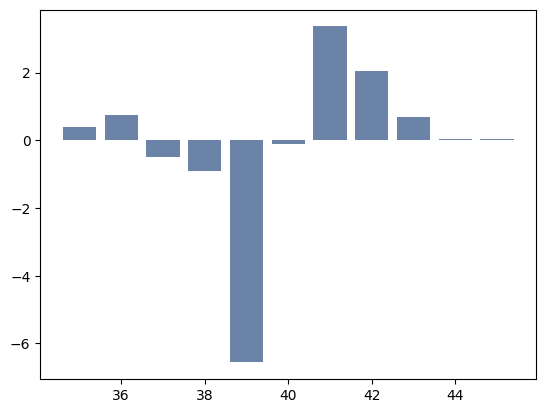

<IPython.core.display.Javascript object>

In [14]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.prob(week)
    p2 = other_pmf.prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)
thinkplot.bar(weeks, diffs)

In this code, `weeks` is the range of weeks; `diffs` is the difference
between the two PMFs in percentage points.
Figure [\[probability_nsfg_diffs\]](#probability_nsfg_diffs){reference-type="ref"
reference="probability_nsfg_diffs"} shows the result as a bar chart.
This figure makes the pattern clearer: first babies are less likely to
be born in week 39, and somewhat more likely to be born in weeks 41 and
42.

![Difference, in percentage points, by
week.](figs/probability_nsfg_diffs.pdf){height="2.5in"}

For now we should hold this conclusion only tentatively. We used the
same dataset to identify an apparent difference and then chose a
visualization that makes the difference apparent. We can't be sure this
effect is real; it might be due to random variation. We'll address this
concern later.

## The class size paradox

Before we go on, I want to demonstrate one kind of computation you can
do with Pmf objects; I call this example the "class size paradox."

At many American colleges and universities, the student-to-faculty ratio
is about 10:1. But students are often surprised to discover that their
average class size is bigger than 10. There are two reasons for the
discrepancy:

-   Students typically take 4--5 classes per semester, but professors
    often teach 1 or 2.

-   The number of students who enjoy a small class is small, but the
    number of students in a large class is (ahem!) large.

The first effect is obvious, at least once it is pointed out; the second
is more subtle. Let's look at an example. Suppose that a college offers
65 classes in a given semester, with the following distribution of
sizes:

If you ask the Dean for the average class size, he would construct a
PMF, compute the mean, and report that the average class size is 23.7.
Here's the code:

In [15]:
d = {(7): 8, (12): 8, (17): 14, (22): 4, (27): 6, (32): 12, (37): 8, (42): 3, (47): 2}
pmf = thinkstats2.Pmf(d, label="actual")
print("mean", pmf.mean())

mean 23.692307692307693


<IPython.core.display.Javascript object>

But if you survey a group of students, ask them how many students are in
their classes, and compute the mean, you would think the average class
was bigger. Let's see how much bigger.

First, I compute the distribution as observed by students, where the
probability associated with each class size is "biased" by the number of
students in the class.

In [16]:
def bias_pmf(pmf, label):
    new_pmf = pmf.copy(label=label)
    for x, p in pmf.items():
        new_pmf.mult(x, x)
    new_pmf.normalize()
    return new_pmf

<IPython.core.display.Javascript object>

For each class size, `x`, we multiply the probability by `x`, the number
of students who observe that class size. The result is a new Pmf that
represents the biased distribution.

Now we can plot the actual and observed distributions:

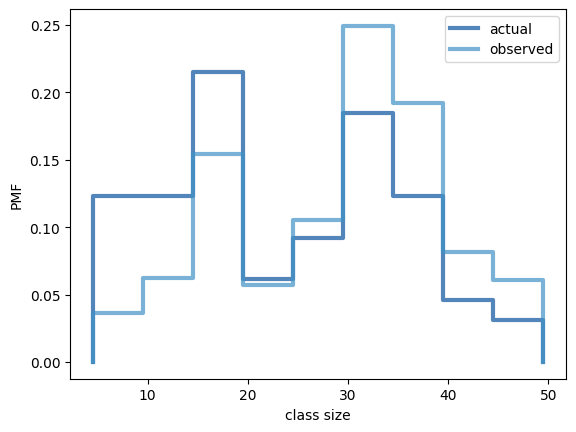

<Figure size 800x600 with 0 Axes>

<IPython.core.display.Javascript object>

In [17]:
biased_pmf = bias_pmf(pmf, label="observed")
thinkplot.pre_plot(2)
thinkplot.pmfs([pmf, biased_pmf])
thinkplot.show(xlabel="class size", ylabel="PMF")

![Distribution of class sizes, actual and as observed by
students.](figs/class_size1.pdf){height="3.0in"}

Figure [\[class_size1\]](#class_size1){reference-type="ref"
reference="class_size1"} shows the result. In the biased distribution
there are fewer small classes and more large ones. The mean of the
biased distribution is 29.1, almost 25% higher than the actual mean.

It is also possible to invert this operation. Suppose you want to find
the distribution of class sizes at a college, but you can't get reliable
data from the Dean. An alternative is to choose a random sample of
students and ask how many students are in their classes.

The result would be biased for the reasons we've just seen, but you can
use it to estimate the actual distribution. Here's the function that
unbiases a Pmf:

In [18]:
def unbias_pmf(pmf, label):
    new_pmf = pmf.copy(label=label)
    for x, p in pmf.items():
        new_pmf.mult(x, 1.0 / x)
    new_pmf.normalize()
    return new_pmf

<IPython.core.display.Javascript object>

It's similar to `BiasPmf`; the only difference is that it divides each
probability by `x` instead of multiplying.

## DataFrame indexing

In Section [\[dataframe\]](#dataframe){reference-type="ref"
reference="dataframe"} we read a pandas DataFrame and used it to select
and modify data columns. Now let's look at row selection. To start, I
create a NumPy array of random numbers and use it to initialize a
DataFrame:

In [19]:
import numpy as np
import pandas

array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

,0,1
0,0.590152,0.631478
1,0.361395,-0.355633
2,-0.551774,1.083907
3,1.303805,-1.116402


<IPython.core.display.Javascript object>

By default, the rows and columns are numbered starting at zero, but you
can provide column names:

In [20]:
columns = ["A", "B"]
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,0.590152,0.631478
1,0.361395,-0.355633
2,-0.551774,1.083907
3,1.303805,-1.116402


<IPython.core.display.Javascript object>

You can also provide row names. The set of row names is called the
**index**; the row names themselves are called **labels**.

In [21]:
index = ["a", "b", "c", "d"]
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,0.590152,0.631478
b,0.361395,-0.355633
c,-0.551774,1.083907
d,1.303805,-1.116402


<IPython.core.display.Javascript object>

As we saw in the previous chapter, simple indexing selects a column,
returning a Series:

In [22]:
df["A"]

a    0.590152
b    0.361395
c   -0.551774
d    1.303805
Name: A, dtype: float64

<IPython.core.display.Javascript object>

To select a row by label, you can use the `loc` attribute, which returns
a Series:

In [23]:
df.loc["a"]

A    0.590152
B    0.631478
Name: a, dtype: float64

<IPython.core.display.Javascript object>

If you know the integer position of a row, rather than its label, you
can use the `iloc` attribute, which also returns a Series.

In [24]:
df.iloc[0]

A    0.590152
B    0.631478
Name: a, dtype: float64

<IPython.core.display.Javascript object>

`loc` can also take a list of labels; in that case, the result is a
DataFrame.

In [25]:
indices = ["a", "c"]
df.loc[indices]

,A,B
a,0.590152,0.631478
c,-0.551774,1.083907


<IPython.core.display.Javascript object>

Finally, you can use a slice to select a range of rows by label:

In [26]:
df["a":"c"]

,A,B
a,0.590152,0.631478
b,0.361395,-0.355633
c,-0.551774,1.083907


<IPython.core.display.Javascript object>

Or by integer position:

In [27]:
df[0:2]

,A,B
a,0.590152,0.631478
b,0.361395,-0.355633


<IPython.core.display.Javascript object>

The result in either case is a DataFrame, but notice that the first
result includes the end of the slice; the second doesn't.

My advice: if your rows have labels that are not simple integers, use
the labels consistently and avoid using integer positions.

## Exercises

Solutions to these exercises are in `chap03soln.ipynb` and
`chap03soln.py`

### Exercise
Something like the class size paradox appears if you survey children and
ask how many children are in their family. Families with many children
are more likely to appear in your sample, and families with no children
have no chance to be in the sample.

Use the NSFG respondent variable `NUMKDHH` to construct the actual
distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the
children and asked them how many children under 18 (including
themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a
starting place, you can use `chap03ex.ipynb`.


### Exercise
In Section [\[mean\]](#mean){reference-type="ref" reference="mean"} we
computed the mean of a sample by adding up the elements and dividing by
n. If you are given a PMF, you can still compute the mean, but the
process is slightly different: $$\xbar = \sum_i p_i~x_i$$ where the
$x_i$ are the unique values in the PMF and $p_i=PMF(x_i)$. Similarly,
you can compute variance like this: $$S^2 = \sum_i p_i~(x_i - \xbar)^2$$
Write functions called `PmfMean` and `PmfVar` that take a Pmf object and
compute the mean and variance. To test these methods, check that they
are consistent with the methods `Mean` and `Var` provided by Pmf.


### Exercise
I started with the question, "Are first babies more likely to be late?"
To address it, I computed the difference in means between groups of
babies, but I ignored the possibility that there might be a difference
between first babies and others *for the same woman*.

To address this version of the question, select respondents who have at
least two babies and compute pairwise differences. Does this formulation
of the question yield a different result?

Hint: use `nsfg.MakePregMap`.

### Exercise
In most foot races, everyone starts at the same time. If you are a fast
runner, you usually pass a lot of people at the beginning of the race,
but after a few miles everyone around you is going at the same speed.

When I ran a long-distance (209 miles) relay race for the first time, I
noticed an odd phenomenon: when I overtook another runner, I was usually
much faster, and when another runner overtook me, he was usually much
faster.

At first I thought that the distribution of speeds might be bimodal;
that is, there were many slow runners and many fast runners, but few at
my speed.

Then I realized that I was the victim of a bias similar to the effect of
class size. The race was unusual in two ways: it used a staggered start,
so teams started at different times; also, many teams included runners
at different levels of ability.

As a result, runners were spread out along the course with little
relationship between speed and location. When I joined the race, the
runners near me were (pretty much) a random sample of the runners in the
race.

So where does the bias come from? During my time on the course, the
chance of overtaking a runner, or being overtaken, is proportional to
the difference in our speeds. I am more likely to catch a slow runner,
and more likely to be caught by a fast runner. But runners at the same
speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a Pmf representing the
actual distribution of runners' speeds, and the speed of a running
observer, and returns a new Pmf representing the distribution of
runners' speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results
from the James Joyce Ramble 10K in Dedham MA and converts the pace of
each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay
race at 7.5 mph with this group of runners. A solution to this exercise
is in `relay_soln.py`.


## Glossary

-   **Probability mass function (PMF)**: a representation of a
    distribution as a function that maps from values to probabilities.

-   **probability**: A frequency expressed as a fraction of the sample
    size.

-   **normalization**: The process of dividing a frequency by a sample
    size to get a probability.

-   **index**: In a pandas DataFrame, the index is a special column that
    contains the row labels.

## Exercises

**Exercise:** In Chapter 3 we computed the mean of a sample by adding up
the elements and dividing by n.  If you are given a PMF, you can
still compute the mean, but the process is slightly different:
%
$$ \bar x = \sum_i p_i~x_i $$
%
where the $x_i$ are the unique values in the PMF and $p_i=PMF(x_i)$.
Similarly, you can compute variance like this:
%
$$ S^2 = \sum_i p_i~(x_i - \bar x)^2 $$
% 
Write functions called `PmfMean` and `PmfVar` that take a
Pmf object and compute the mean and variance.  To test these methods,
check that they are consistent with the methods `Mean` and `Var`
provided by `Pmf`.

In [28]:
def pmf_mean(pmf):
    """Computes the mean of a PMF.
    Returns:
        float mean
    """
    return sum(p * x for x, p in pmf.items())

<IPython.core.display.Javascript object>

In [29]:
def pmf_var(pmf, mu=None):
    """Computes the variance of a PMF.
    mu: the point around which the variance is computed;
            if omitted, computes the mean
    returns: float variance
    """
    if mu is None:
        mu = pmf_mean(pmf)
    return sum(p * (x - mu) ** 2 for x, p in pmf.items())

<IPython.core.display.Javascript object>

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [30]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/2002FemResp.dct")
download(
    "https://github.com/AllenDowney/ThinkStats/raw/v3/nb/2002FemResp.dat.gz"
)

<IPython.core.display.Javascript object>

In [31]:
resp = nsfg.read_fem_resp()

<IPython.core.display.Javascript object>

In [32]:
pmf = thinkstats2.Pmf(resp.numkdhh, label="numkdhh")

<IPython.core.display.Javascript object>

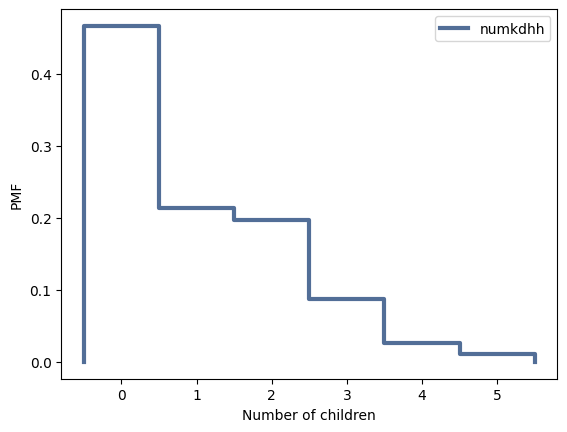

<IPython.core.display.Javascript object>

In [33]:
thinkplot.pmf(pmf)
thinkplot.config(xlabel="Number of children", ylabel="PMF")

In [34]:
biased = bias_pmf(pmf, label="biased")

<IPython.core.display.Javascript object>

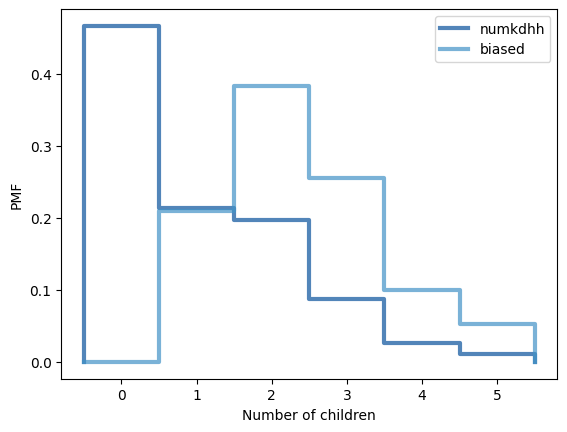

<IPython.core.display.Javascript object>

In [35]:
thinkplot.pre_plot(2)
thinkplot.pmfs([pmf, biased])
thinkplot.config(xlabel="Number of children", ylabel="PMF")

In [36]:
pmf.mean()

1.024205155043831

<IPython.core.display.Javascript object>

In [37]:
biased.mean()

2.403679100664282

<IPython.core.display.Javascript object>

**Exercise:** I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use `nsfg.MakePregMap`:

In [38]:
live, firsts, others = nsfg.make_frames()

<IPython.core.display.Javascript object>

In [39]:
preg_map = nsfg.make_preg_map(live)

<IPython.core.display.Javascript object>

In [40]:
hist = thinkstats2.Hist()
for caseid, indices in preg_map.items():
    if len(indices) >= 2:
        pair = live.loc[indices[0:2]].prglngth
        diff = np.diff(pair)[0]
        hist[diff] += 1

<IPython.core.display.Javascript object>

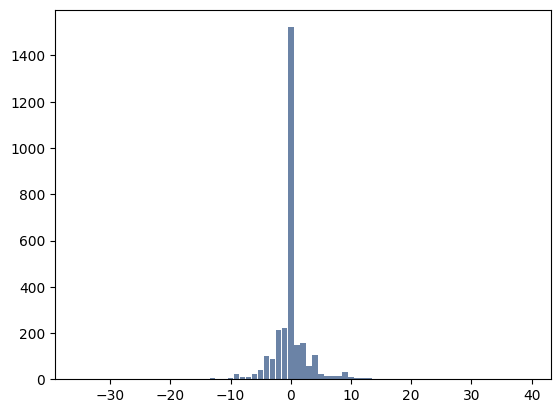

<IPython.core.display.Javascript object>

In [41]:
thinkplot.hist(hist)

In [42]:
pmf = thinkstats2.Pmf(hist)
pmf.mean()

-0.056367432150313125

<IPython.core.display.Javascript object>

**Exercise:** In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [43]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/relay.py")
download(
    "https://github.com/AllenDowney/ThinkStats/raw/v3/nb/Apr25_27thAn_set1.shtml"
)

<IPython.core.display.Javascript object>

In [44]:
import relay

results = relay.read_results()
speeds = relay.get_speeds(results)
speeds = relay.bin_data(speeds, 3, 12, 100)

<IPython.core.display.Javascript object>

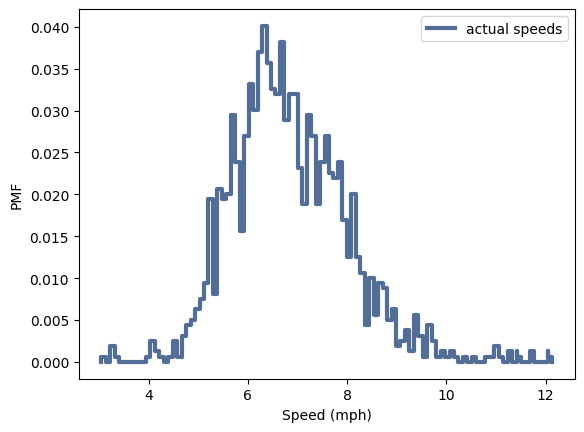

<IPython.core.display.Javascript object>

In [45]:
pmf = thinkstats2.Pmf(speeds, "actual speeds")
thinkplot.pmf(pmf)
thinkplot.config(xlabel="Speed (mph)", ylabel="PMF")

In [46]:
def observed_pmf(pmf, speed, label=None):
    """Returns a new Pmf representing speeds observed at a given speed.

    The chance of observing a runner is proportional to the difference
    in speed.

    Args:
        pmf: distribution of actual speeds
        speed: speed of the observing runner
        label: string label for the new dist

    Returns:
        Pmf object
    """
    new = pmf.copy(label=label)
    for val in new.values():
        diff = abs(val - speed)
        new[val] *= diff
    new.normalize()
    return new

<IPython.core.display.Javascript object>

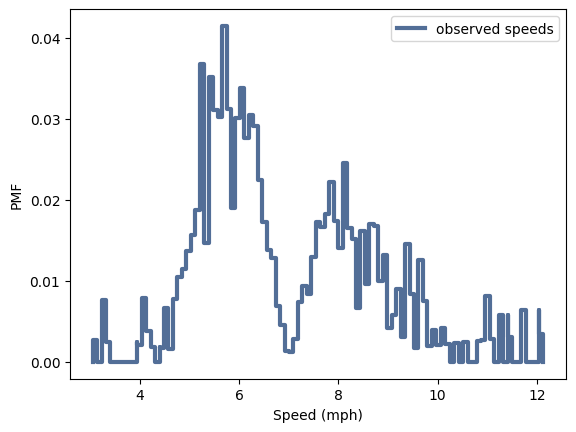

<IPython.core.display.Javascript object>

In [47]:
biased = observed_pmf(pmf, 7, label="observed speeds")
thinkplot.pmf(biased)
thinkplot.config(xlabel="Speed (mph)", ylabel="PMF")